In [2]:
"""
Universidad del Valle de Guatemala
HT2 2
Mineria de datos
Roberto Rios, 20979
Javier Valle, 20159
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import scipy.cluster.hierarchy as sch

In [34]:
# Ejercicio 1

# Cargando el csv con pandas.
import pandas as pd

df = pd.read_csv("movies.csv", encoding='ISO-8859-1')

# Imprimendo todas las columnas.
print(df.columns)



Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'],
      dtype='object')


In [83]:
# ejercicio 2

# hopkins

from sklearn.preprocessing import scale, MinMaxScaler, normalize
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from pyclustertend import vat

df = pd.read_csv("movies.csv", encoding='ISO-8859-1')

# dejar unicamente las columnas numericas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df2 = df[numerical_cols]
df2 = df.drop('id',axis=1)


def hopkins(X: pd.DataFrame):
    m, d = X.shape
    # aplicar un modelo para encontrar al k-nn de los puntos en el dataset
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    
    # data random para comparar
    rand_X = np.random.uniform(low=X.min(), high=X.max(), size=(m, d))

    # hayar kneighbors
    rand_nbrs_dist, _ = nbrs.kneighbors(rand_X)
    data_nbrs_dist, _ = nbrs.kneighbors(normalize(X))

    
    # obtener el hopkins statistic
    hopkins = sum(rand_nbrs_dist) / (sum(rand_nbrs_dist) + sum(data_nbrs_dist))

    return hopkins[0]


# compute the Hopkins statistic
hopkins_statistic = hopkins(df2)

print("Hopkins statistic:", hopkins_statistic)



c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Hopkins statistic: 0.9999998601259021


In [18]:
# VAT

"""
      ['budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount']


"""


from sklearn.preprocessing import scale, MinMaxScaler, normalize
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from pyclustertend import vat

df = pd.read_csv("movies.csv", encoding='ISO-8859-1')

# convert the categorical features in the dataset to numerical 
df_encoded = df.drop('id',axis=1)
df_encoded = df.select_dtypes(exclude=['int64', 'float64']).columns
df_encoded = pd.get_dummies(df, columns=['productionCompany',
       'productionCompanyCountry', 'productionCountry',
       'director',
       'originalLanguage',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'])

# obtain vat matrix
v = vat(df_encoded)

MemoryError: Unable to allocate 50.8 MiB for an array with shape (10000, 5330) and data type uint8

In [22]:
import numpy as np

# Primera gráfica de codo.

# Creando un arreglo con los datos de las columnas a utilizar.
X = np.array(df[["voteAvg", "voteCount", "popularity", "budget", "revenue", "runtime"]])


# Ejercicio 3: Calcular el número adecuado de grupos a formar.

clusters = range(1, 11)
wcss = []

# Cálculo de la varianza dentro del cluster.
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficando la varianza dentro del cluster.
pl.plot(clusters, wcss)
pl.title('Gráfica de codo')
pl.xlabel('Número de clusters')
pl.ylabel('Varianza dentro del cluster')
pl.show()

# Segunda gráfica de codo.

# Creando un arreglo con los datos de las columnas a utilizar.
Y = np.array(df[["genresAmount","voteAvg", "genresAmount"]])

clusters = range(1, 11)
wcss = []

# Cálculo de la varianza dentro del cluster.
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

# Graficando la varianza dentro del cluster.
pl.plot(clusters, wcss)
pl.title('Gráfica 2 de codo')
pl.xlabel('Número de clusters')
pl.ylabel('Varianza dentro del cluster')
pl.show()

# Tercera gráfica de codo.

# Creando un arreglo con los datos de las columnas a utilizar.
Z = np.array(df[["productionCoAmount", "productionCountriesAmount", "castWomenAmount", "castMenAmount"]])

clusters = range(1, 11)
wcss = []

# Cálculo de la varianza dentro del cluster.
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

# Graficando la varianza dentro del cluster.
pl.plot(clusters, wcss)
pl.title('Gráfica 3 de codo')
pl.xlabel('Número de clusters')
pl.ylabel('Varianza dentro del cluster')
pl.show()

NameError: name 'KMeans' is not defined

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 3 0 ... 3 3 3]


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 3 0 ... 3 3 3]


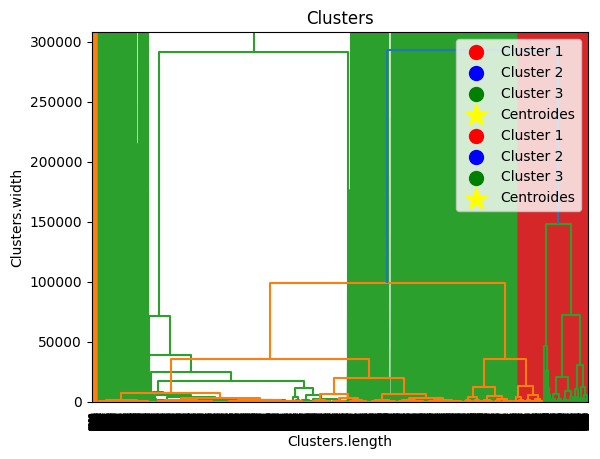

In [13]:
from sklearn.cluster import KMeans

# Ejercicio 4: Usar los algoritmos k-medias y cluster jerárquico para agrupar los datos.

# Creando el modelo de k-medias. Cluster X.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Calculando el centroide de cada cluster.
centroids = kmeans.cluster_centers_
print(centroids)

cluster1 = kmeans.predict(X)

# Graficando los clusters.
pl.scatter(X[cluster1 == 0, 0], X[cluster1 == 0, 1],s=100,c='red', label = "Cluster 1")
pl.scatter(X[cluster1 == 1, 0], X[cluster1 == 1, 1],s=100,c='blue', label = "Cluster 1")
pl.scatter(X[cluster1 == 2, 0], X[cluster1 == 2, 1],s=100,c='green', label = "Cluster 1")
pl.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
pl.title("Grupo 1")
pl.xlabel("Cluster1.length")
pl.ylabel("Cluster1.width")
pl.legend()

# Creando el modelo de k-medias. Cluster Y.
kmeans = KMeans(n_clusters=5)
kmeans.fit(Y)

# Calculando el centroide de cada cluster.
centroids = kmeans.cluster_centers_
print(centroids)

cluster2 = kmeans.predict(Y)


# Graficando los clusters.
pl.scatter(Y[cluster2 == 0, 0], Y[cluster2 == 0, 1],s=100,c='red', label = "Cluster 2")
pl.scatter(Y[cluster2 == 1, 0], Y[cluster2 == 1, 1],s=100,c='blue', label = "Cluster 2")
pl.scatter(Y[cluster2 == 2, 0], Y[cluster2 == 2, 1],s=100,c='green', label = "Cluster 2")
pl.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
pl.title("Clusters")
pl.xlabel("Cluster1.length")
pl.ylabel("Cluster1.width")
pl.legend()


# Aplicando el clustering jerárquico a nuestro dataset. Cluster X.
jer1 = sch.dendrogram(sch.linkage(X, method = 'ward'))

hc1 = cluster.AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
especieHC1 = hc1.fit_predict(Y)

print(especieHC1)

pl.scatter(X[especieHC1 == 0, 0], X[especieHC1 == 0, 1],s=100,c='red', label = "Cluster 1")
pl.scatter(X[especieHC1 == 1, 0], X[especieHC1 == 1, 1],s=100,c='blue', label = "Cluster 2")
pl.scatter(X[especieHC1 == 2, 0], X[especieHC1 == 2, 1],s=100,c='green', label = "Cluster 3")
pl.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
pl.title("Clusters")
pl.xlabel("Clusters.length")
pl.ylabel("Clusters.width")
pl.legend()

# Aplicando el clustering jerárquico a nuestro dataset. Cluster X.
jer2 = sch.dendrogram(sch.linkage(Y, method = 'ward'))

hc2 = cluster.AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
especieHC2 = hc1.fit_predict(Y)

print(especieHC1)

pl.scatter(Y[especieHC2 == 0, 0], Y[especieHC2 == 0, 1],s=100,c='red', label = "Cluster 1")
pl.scatter(Y[especieHC2 == 1, 0], Y[especieHC2 == 1, 1],s=100,c='blue', label = "Cluster 2")
pl.scatter(Y[especieHC2 == 2, 0], Y[especieHC2 == 2, 1],s=100,c='green', label = "Cluster 3")
pl.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
pl.title("Clusters")
pl.xlabel("Clusters.length")
pl.ylabel("Clusters.width")
pl.legend()

In [ ]:
# ejercicio 5



In [ ]:
# ejercicio 6


